#### k_means clustering

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

synthetic data

In [2]:
# 300 random points centered around 4 distinct blobs
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

The Elbow Method (To find the best K)

In [3]:
wcss = [] # Within-Cluster Sum of Squares (Inertia)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

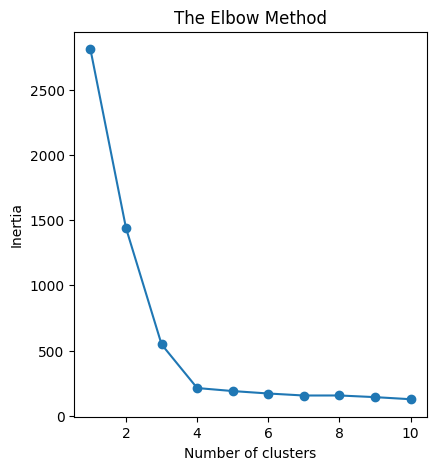

In [4]:
# Plot the Elbow Graph
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

#### optimal k is 4 from above graph 
as WCSS becomes stagnant

In [5]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

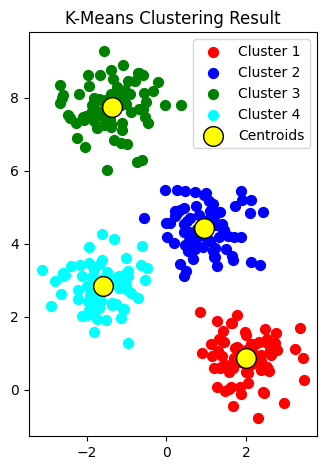

In [6]:
plt.subplot(1, 2, 2)
# Plot the data points, colored by their cluster
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=50, c='cyan', label='Cluster 4')

# Plot the Centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='yellow', label='Centroids', edgecolors='black')

plt.title('K-Means Clustering Result')
plt.legend()
plt.tight_layout()
plt.show()